## Librerias 

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


## Carga de base de datos 

In [6]:

data = pd.read_csv('auto-mpg.csv') 
data['horsepower'].astype(str).astype(int)

acc = data['acceleration']
logdisp = np.log(data['displacement'])
loghorse = np.log(data['horsepower'])
logweight= np.log(data['weight'])

scaled_acc = (acc-min(acc))/(max(acc)-min(acc))	
scaled_disp = (logdisp-np.mean(logdisp))/np.sqrt(np.var(logdisp))
scaled_horse = (loghorse-np.mean(loghorse))/(max(loghorse)-min(loghorse))
scaled_weight= (logweight-np.mean(logweight))/np.sqrt(np.var(logweight))

data_fin = pd.DataFrame([])
data_fin['acc'] = scaled_acc
data_fin['disp'] = scaled_disp
data_fin['horse'] = scaled_horse
data_fin['weight'] = scaled_weight
cyl_dummies = pd.get_dummies(data['cylinders'], prefix='cyl', drop_first=True)
yr_dummies = pd.get_dummies(data['model year'], prefix='yr', drop_first=True)
orig_dummies = pd.get_dummies(data['origin'], prefix='orig', drop_first=True)
mpg = data['mpg']
data_fin = pd.concat([mpg, data_fin, cyl_dummies, yr_dummies, orig_dummies], axis=1)

In [7]:
data = pd.concat([mpg, scaled_acc, scaled_weight, orig_dummies], axis= 1)
y = data[['mpg']]
X = data.drop(['mpg'], axis=1)

## validacion cruzada


In [8]:

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

## Modelo de graficacion 

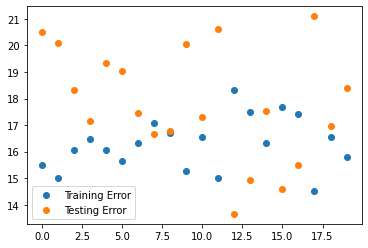

In [9]:

num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

In [12]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train, y_train)

In [11]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

C:\Users\alejo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: Unknown label type: 'continuous'